# Step 1: Perform Exploratory Data Analysis (EDA)

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")

In [15]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [16]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [18]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [24]:
corr_matrix = df.corr()

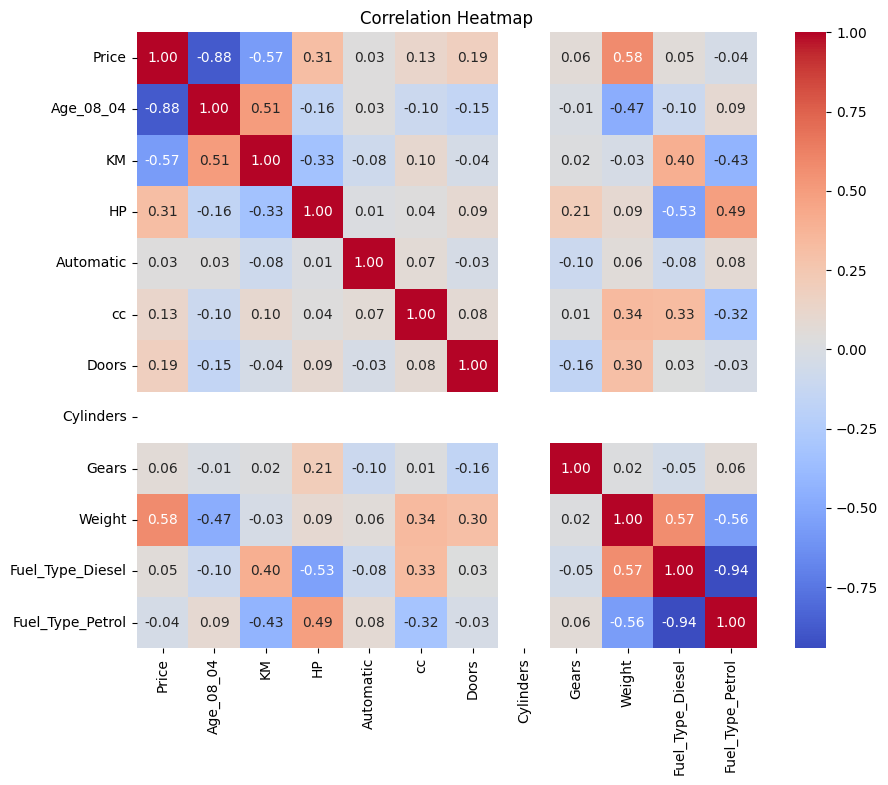

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

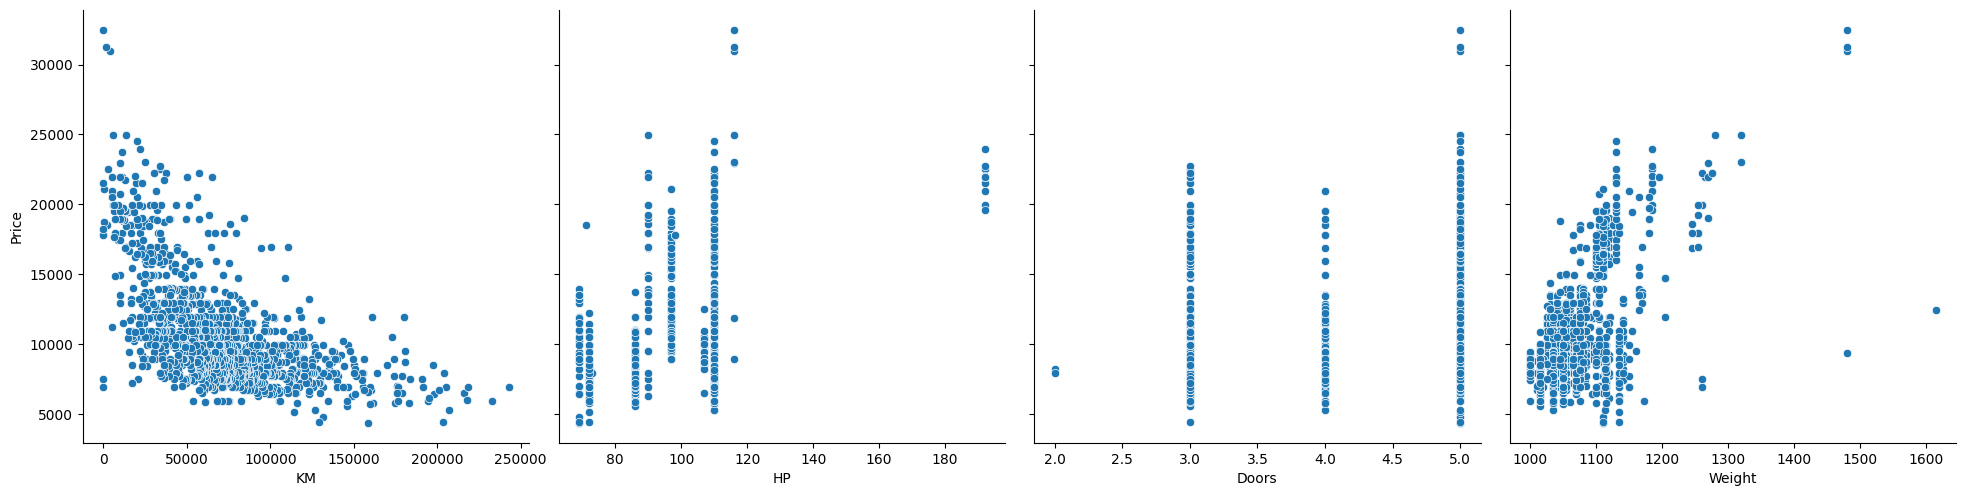

In [21]:
sns.pairplot(df, x_vars=[ 'KM', 'HP',  'Doors', 'Weight' ], y_vars='Price', height=5)
plt.show()


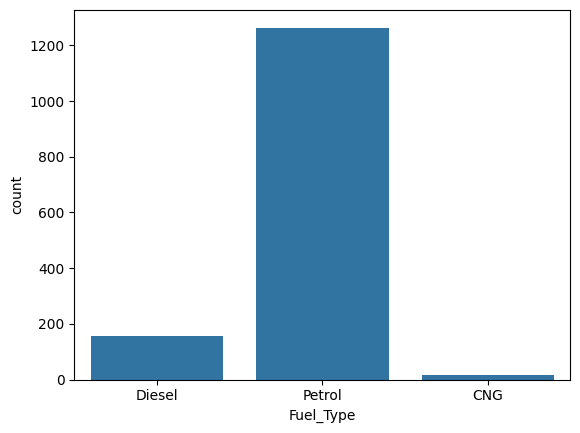

In [22]:
sns.countplot(x='Fuel_Type', data=df)
plt.show()


In [23]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [25]:
df = df.dropna()

# Step 2: Split the dataset into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(columns=['Price'])
y = df['Price']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
print(f'Training data size: {X_train.shape}')
print(f'Testing data size: {X_test.shape}')

Training data size: (1148, 11)
Testing data size: (288, 11)


In [30]:
X

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,4,5,1165,True,False
1,23,72937,90,0,2000,3,4,5,1165,True,False
2,24,41711,90,0,2000,3,4,5,1165,True,False
3,26,48000,90,0,2000,3,4,5,1165,True,False
4,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025,False,True
1432,72,19000,86,0,1300,3,4,5,1015,False,True
1433,71,17016,86,0,1300,3,4,5,1015,False,True
1434,70,16916,86,0,1300,3,4,5,1015,False,True


# Step 3: Build a Multiple Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [32]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [33]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


             Feature   Coefficient
0          Age_08_04 -1.208305e+02
1                 KM -1.623141e-02
2                 HP  1.403948e+01
3          Automatic  1.488309e+02
4                 cc -3.037219e-02
5              Doors -6.031097e+01
6          Cylinders -1.620037e-12
7              Gears  5.516007e+02
8             Weight  2.588496e+01
9   Fuel_Type_Diesel -6.854876e+01
10  Fuel_Type_Petrol  1.370809e+03


In [34]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [42]:
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)


In [43]:
print(f'Training RMSE: {train_rmse}, Training R²: {train_r2}')
print(f'Testing RMSE: {test_rmse}, Testing R²: {test_r2}')

Training RMSE: 1303.339622411835, Training R²: 0.8702643169608926
Testing RMSE: 1484.2654153296514, Testing R²: 0.8348888040611082


# Step 4: Build 3 Different Models

Model 1: Without Feature Selection

In [35]:
model1 = LinearRegression()

In [36]:
model1.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred1 = model1.predict(X_test)
print(f'Model 1 - Test RMSE: {mean_squared_error(y_test, y_pred1, squared=False)}')

Model 1 - Test RMSE: 1484.2654153296514


In [45]:
print("Model 1 Coefficients:", model1.coef_)

Model 1 Coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01 -1.62003744e-12  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]


Model 2: with fewer features

In [67]:
X_train_reduced = X_train.drop(columns=['Doors', 'Gears'])
X_test_reduced = X_test.drop(columns=['Doors', 'Gears'])


In [68]:
model2 = LinearRegression()

In [69]:
model2.fit(X_train_reduced, y_train)


LinearRegression()

In [70]:
print("Model 2 Coefficients:", model2.coef_)

Model 2 Coefficients: [-1.20974609e+02 -1.61643706e-02  1.69675393e+01  1.27957087e+02
 -3.55269946e-02 -7.38964445e-13  2.50463363e+01  1.08846049e+02
  1.41707611e+03]


Model 3: Using Polynomial Features

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [73]:
model3 = LinearRegression()
model3.fit(X_train_poly, y_train)
y_pred3 = model3.predict(X_test_poly)

In [74]:
print(f'Model 3 - Test RMSE: {mean_squared_error(y_test, y_pred3, squared=False)}')

Model 3 - Test RMSE: 1786.1941547981548


In [75]:
print("Model 3 Coefficients:", model3.coef_)

Model 3 Coefficients: [-5.34900910e-03 -9.74895992e+00 -1.32138813e-02 -5.73306397e+02
  6.40162998e+02  3.26477420e+01 -1.85411380e+03 -1.59818704e-07
  1.45201050e+04  7.89202065e+01  3.96364109e+02 -2.58342107e+02
  1.05146946e-02  3.93427852e-04  5.81196389e-01  1.00938920e+01
 -9.58257270e-02  1.30386304e+01 -3.89897113e+01  1.95757071e+02
 -8.17263030e-01  5.56572239e+01 -4.71185377e+01 -8.73696302e-08
 -2.36788657e-04 -2.39563419e-03  1.96022452e-06 -3.42857631e-03
 -5.28515065e-02 -1.72541270e-03  2.07879371e-04  7.21181462e-03
  2.50163649e-02  4.99697761e-01 -2.09011001e+02 -6.36542873e-02
 -1.19944527e+01 -2.29322557e+03  4.78431782e+02  8.57910679e-02
  7.34418617e+03  7.26492766e+03  6.40163010e+02  1.48694125e+01
 -3.00868795e+02  2.56065204e+03 -5.70626793e+03 -4.91191544e+00
  1.47011292e-11  2.18562225e+04 -1.50414126e-03 -3.56647861e-01
  1.30590945e+02 -4.04612789e+00  2.12938067e-02 -5.34367698e+02
 -5.37167635e+02 -2.59089902e+02 -7.41645519e+03  5.48006257e+03
  6

In [76]:
from sklearn.metrics import mean_squared_error, r2_score


In [77]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test_reduced)
y_pred3 = model3.predict(X_test_poly)


In [78]:
# Model 1 Evaluation
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
print(f"Model 1: MSE = {mse1}, R-squared = {r2_1}")

Model 1: MSE = 2203043.8231437025, R-squared = 0.8348888040611082


In [79]:
# Model 2 Evaluation
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
print(f"Model 2: MSE = {mse2}, R-squared = {r2_2}")


Model 2: MSE = 2203578.7714499882, R-squared = 0.8348487113704007


In [80]:
# Model 3 Evaluation
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)
print(f"Model 3: MSE = {mse3}, R-squared = {r2_3}")

Model 3: MSE = 3190489.558635095, R-squared = 0.7608828561998034


# Step 5: Apply Lasso and Ridge Regression

Lasso Regression

In [81]:
from sklearn.linear_model import Lasso


In [83]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression: MSE = {mse_lasso}, R-squared = {r2_lasso}")

Lasso Regression: MSE = 2195387.2460865397, R-squared = 0.8354626403967389


Ridge Regression

In [84]:
from sklearn.linear_model import Ridge

In [85]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression: MSE = {mse_ridge}, R-squared = {r2_ridge}")


Ridge Regression: MSE = 2202732.244167894, R-squared = 0.8349121559240102
